In [10]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [15]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install stable-baselines3

In [6]:
!pip install pyglet > /dev/null 2>&1 

In [ ]:
import gym
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [3]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

In [4]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

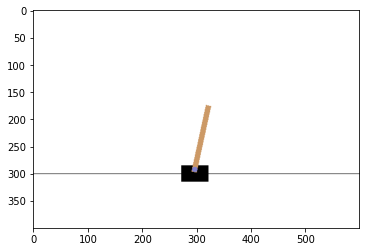

In [7]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [8]:
episodes = 5

for episode in range(1, episodes+1):
  state = env.reset()
  done = False
  score = 0
  score = 0

  while not done:
    env.render()
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    score += reward
  print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:23.0
Episode:2 Score:17.0
Episode:3 Score:27.0
Episode:4 Score:13.0
Episode:5 Score:28.0


In [9]:
log_path = os.path.join('Training', 'Logs')

In [10]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)  

Using cpu device


In [11]:
model.learn(total_timesteps=10000)

Logging to Training/Logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 471  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 604         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008696609 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000498   |
|    learning_rate        | 0.0003      |
|    loss                 | 8.18        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 56.3        |
-----------------------------------------
---

In [12]:
model.save("my_model_cart_pole")

In [13]:
episodes = 5
for episode in range(1, episodes+1):
  obs = env.reset()
  done = False
  score = 0

  while not done:
    env.render()
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    score += reward
  print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:[144.]
Episode:2 Score:[49.]
Episode:3 Score:[128.]
Episode:4 Score:[128.]
Episode:5 Score:[117.]
